In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set_style('darkgrid')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)  # Ensures that the display width isn't restricted
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv('Network_anomaly_data.csv')
df.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numroot,numfilecreations,numshells,numaccessfiles,numoutboundcmds,ishostlogin,isguestlogin,count,srvcount,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [4]:
# land, wrongfragment,urgent, numfailedlogins,loggedin,rootshell,suattempted,numshells,ishostlogin,isguestlogin
df['land'] = df['land'].astype('category')
df['wrongfragment'] = df['wrongfragment'].astype('category')
df['urgent'] = df['urgent'].astype('category')
#df['numfailedlogins'] = df['numfailedlogins'].astype('category')
df['loggedin'] = df['loggedin'].astype('category')
df['rootshell'] = df['rootshell'].astype('category')
df['suattempted'] = df['suattempted'].astype('category')
df['numshells'] = df['numshells'].astype('category')
df['ishostlogin'] = df['ishostlogin'].astype('category')
df['isguestlogin'] = df['isguestlogin'].astype('category')

In [5]:
# Host count of flags
df['serror'] = df['count']*df['serrorrate']
df['rerror'] = df['count']*df['rerrorrate']

# Host srv count of flags
df['srvserror'] = df['srvcount']*df['srvrerrorrate']
df['srvrerror'] = df['srvcount']*df['srvserrorrate']

df['samesrv'] = df['count']*df['samesrvrate']
df['diffsrv'] = df['count']*df['diffsrvrate']

# Host count of flags
df['dsthostserror'] = df['dsthostcount']*df['dsthostserrorrate']
df['dsthostrerror'] = df['dsthostcount']*df['dsthostrerrorrate']

# Host srv count of flags
df['dsthostsrvserror'] = df['dsthostsrvcount']*df['dsthostsrvrerrorrate']
df['dsthostsrvrerror'] = df['dsthostsrvcount']*df['dsthostsrvserrorrate']

df['dsthostsamesrv'] = df['dsthostsrvcount']*df['dsthostsamesrvrate']
df['dsthostdiffsrv'] = df['dsthostsrvcount']*df['dsthostdiffsrvrate']

In [6]:
from sklearn.model_selection import train_test_split
attack_categories = df['attack'].unique()

# Step 2: Create a stratified split ensuring that each category is in the test set at least once
train_data = pd.DataFrame()
test_data = pd.DataFrame()

# Split the data by each attack category and ensure they appear in test
for category in attack_categories:
    # Get data for the current category
    category_data = df[df['attack'] == category]
    
    # Split into train and test, ensuring each category appears in test
    category_train, category_test = train_test_split(category_data, test_size=0.2, random_state=42)
    
    # Append to the train and test sets
    train_data = pd.concat([train_data,category_train])
    test_data = pd.concat([test_data,category_test])

In [7]:
X_train = train_data.drop('attack',axis=1)
y_train = train_data['attack']
X_test = test_data.drop('attack',axis=1)
y_test = test_data['attack']

In [8]:
y_train.nunique(),y_test.nunique()

(23, 23)

In [9]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)
target_classes = [label_encoder.classes_[i] for i in range(len(label_encoder.classes_))]

In [10]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

categorical_columns = ['protocoltype', 'service', 'flag','land','wrongfragment','urgent','loggedin','rootshell','suattempted','numshells',
                       'ishostlogin','isguestlogin']

encoder = LabelEncoder()
for col in categorical_columns:
    #print(col)
    X_train[col] = encoder.fit_transform(X_train[col])
    X_test[col] = encoder.transform(X_test[col])

In [11]:
numerical_columns = train_data.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

In [12]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42,class_weight='balanced')
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)

<Axes: >

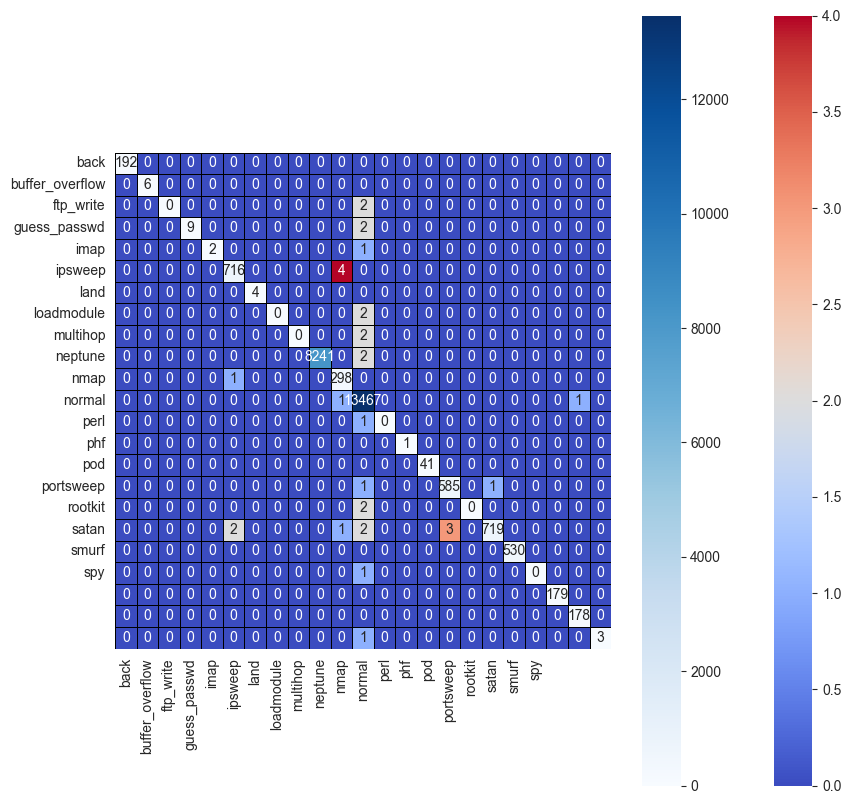

In [13]:
from sklearn.metrics import confusion_matrix


cmrf = confusion_matrix(y_test, y_pred_rf)

cmap = sns.color_palette("coolwarm", as_cmap=True)
mask = np.eye(cmrf.shape[0], dtype=bool)

# Plot the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(cmrf, annot=True, fmt='d', cmap=cmap, cbar=True, square=True, mask=mask, 
            linecolor='black', linewidth=0.5,
            xticklabels=target_classes, yticklabels=target_classes)  # Mask diagonal elements to hide them

# Highlight off-diagonal values (you can choose a specific color for the off-diagonal)
sns.heatmap(cmrf, annot=True, fmt='d', cmap='Blues', cbar=True, square=True, 
            mask=~mask, linecolor='black', linewidth=0.5,
            xticklabels=target_classes[0:-3], yticklabels=target_classes[0:-3]) 

In [14]:
from sklearn.model_selection import RandomizedSearchCV


param_dist = {
    'n_estimators': [100, 150,200,400],
    'max_depth': [None, 10, 20,30,40],
    'min_samples_split': [2, 5,7,10],
    'max_features': ['sqrt', 'log2',None]
}

rf_model = RandomForestClassifier(random_state=42,class_weight='balanced')

random_search_rf = RandomizedSearchCV(rf_model, param_distributions=param_dist, 
                                   n_iter=200, cv=5, scoring='accuracy', 
                                   n_jobs=-1, random_state=42)
random_search_rf.fit(X_train, y_train)
random_search_rf.best_params_

d:\Scaler\end_to_end\Donor_Choose\project\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


{'n_estimators': 100,
 'min_samples_split': 2,
 'max_features': None,
 'max_depth': 30}

<Axes: >

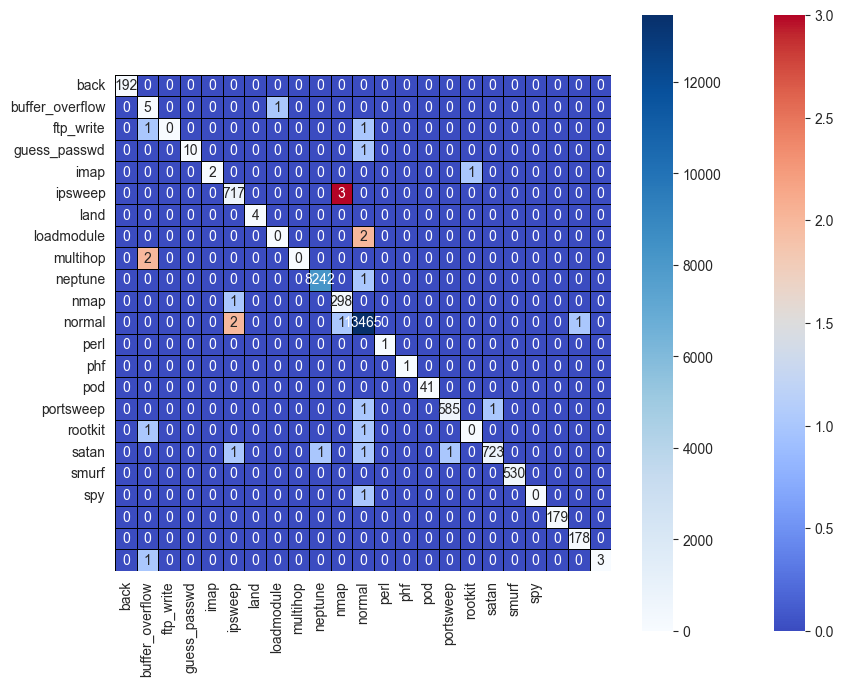

In [15]:
best_rf = random_search_rf.best_estimator_
y_pred_rf_best = best_rf.predict(X_test)

cmbestrf = confusion_matrix(y_test, y_pred_rf_best)

cmap = sns.color_palette("coolwarm", as_cmap=True)
mask = np.eye(cmbestrf.shape[0], dtype=bool)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cmbestrf, annot=True, fmt='d', cmap=cmap, cbar=True, square=True, mask=mask, 
            linecolor='black', linewidth=0.5,
            xticklabels=target_classes, yticklabels=target_classes)  # Mask diagonal elements to hide them

# Highlight off-diagonal values (you can choose a specific color for the off-diagonal)
sns.heatmap(cmbestrf, annot=True, fmt='d', cmap='Blues', cbar=True, square=True, 
            mask=~mask, linecolor='black', linewidth=0.5,
            xticklabels=target_classes[0:-3], yticklabels=target_classes[0:-3]) 

In [25]:
from sklearn.metrics import classification_report
name_labels = [label_encoder.classes_[i] for i in range(len(label_encoder.classes_))]
best_rf_rep = classification_report(y_test, y_pred_rf_best,target_names=name_labels,output_dict=True)
pd.DataFrame(best_rf_rep).T

d:\Scaler\end_to_end\Donor_Choose\project\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Scaler\end_to_end\Donor_Choose\project\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Scaler\end_to_end\Donor_Choose\project\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

,precision,recall,f1-score,support
back,1.000000,1.000000,1.000000,192.000000
buffer_overflow,0.500000,0.833333,0.625000,6.000000
ftp_write,0.000000,0.000000,0.000000,2.000000
guess_passwd,1.000000,0.909091,0.952381,11.000000
imap,1.000000,0.666667,0.800000,3.000000
ipsweep,0.994452,0.995833,0.995142,720.000000
land,1.000000,1.000000,1.000000,4.000000
loadmodule,0.000000,0.000000,0.000000,2.000000
multihop,0.000000,0.000000,0.000000,2.000000
neptune,0.999879,0.999879,0.999879,8243.000000


In [16]:
import xgboost as xgb
xgb1 = xgb.XGBClassifier(objective='binary:logistic')
xgb1.fit(X_train,y_train)

y_pred_xgb = xgb1.predict(X_test)

In [17]:
name_labels = [label_encoder.classes_[i] for i in range(len(label_encoder.classes_))]

<Axes: >

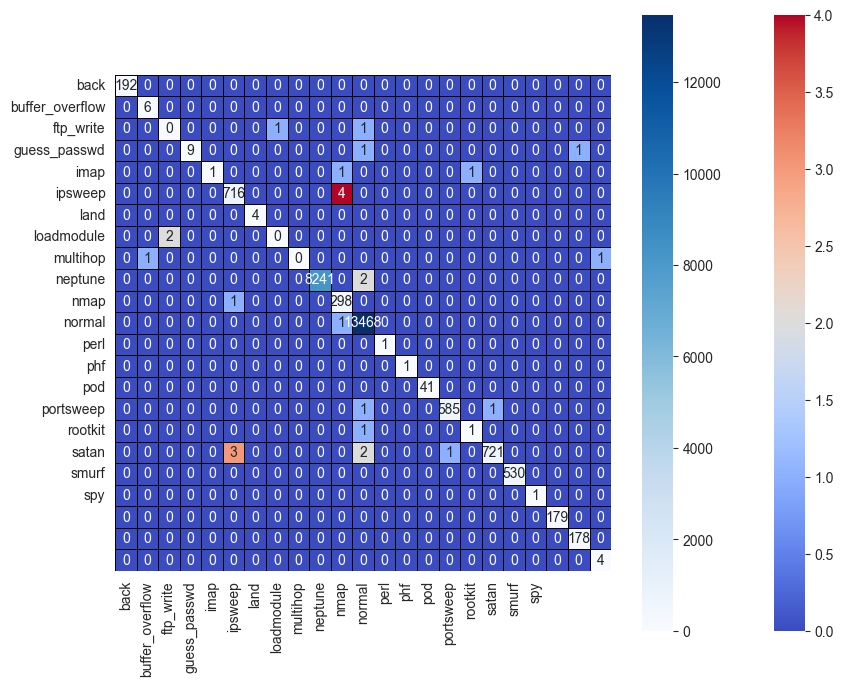

In [19]:
from sklearn.metrics import confusion_matrix

cmxgb = confusion_matrix(y_test, y_pred_xgb)


cmap = sns.color_palette("coolwarm", as_cmap=True)
mask = np.eye(cmbestrf.shape[0], dtype=bool)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cmxgb, annot=True, fmt='d', cmap=cmap, cbar=True, square=True, mask=mask, 
            linecolor='black', linewidth=0.5,
            xticklabels=target_classes, yticklabels=target_classes)  # Mask diagonal elements to hide them

# Highlight off-diagonal values (you can choose a specific color for the off-diagonal)
sns.heatmap(cmxgb, annot=True, fmt='d', cmap='Blues', cbar=True, square=True, 
            mask=~mask, linecolor='black', linewidth=0.5,
            xticklabels=target_classes[0:-3], yticklabels=target_classes[0:-3]) 

In [20]:
from sklearn.metrics import classification_report
report_dict = classification_report(y_test,y_pred_xgb,target_names=name_labels,output_dict=True)
pd.DataFrame(report_dict).T

d:\Scaler\end_to_end\Donor_Choose\project\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Scaler\end_to_end\Donor_Choose\project\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Scaler\end_to_end\Donor_Choose\project\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

,precision,recall,f1-score,support
back,1.000000,1.000000,1.000000,192.000000
buffer_overflow,0.857143,1.000000,0.923077,6.000000
ftp_write,0.000000,0.000000,0.000000,2.000000
guess_passwd,1.000000,0.818182,0.900000,11.000000
imap,1.000000,0.333333,0.500000,3.000000
ipsweep,0.994444,0.994444,0.994444,720.000000
land,1.000000,1.000000,1.000000,4.000000
loadmodule,0.000000,0.000000,0.000000,2.000000
multihop,0.000000,0.000000,0.000000,2.000000
neptune,1.000000,0.999757,0.999879,8243.000000


In [21]:
len(name_labels)

23

In [22]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier


param_dist = {
    'n_estimators': [50,100, 150,200],
    'max_depth': [3,4,5,7],
    "learning_rate": [0.1, 0.2, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

xgb1 = XGBClassifier(objective='multi:softmax', num_class=len(name_labels),random_state=42)

random_search = RandomizedSearchCV(xgb1, param_distributions=param_dist, 
                                   n_iter=200, cv=5, scoring='accuracy', 
                                   n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)
random_search.best_params_

d:\Scaler\end_to_end\Donor_Choose\project\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
d:\Scaler\end_to_end\Donor_Choose\project\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
200 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "d:\Scaler\end_to_end\Donor_Choose\project\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\Scaler\end_to_end\Donor_Choose\project\lib\site-pa

{'subsample': 0.8,
 'n_estimators': 100,
 'max_depth': 7,
 'learning_rate': 0.3,
 'colsample_bytree': 1.0}

<Axes: >

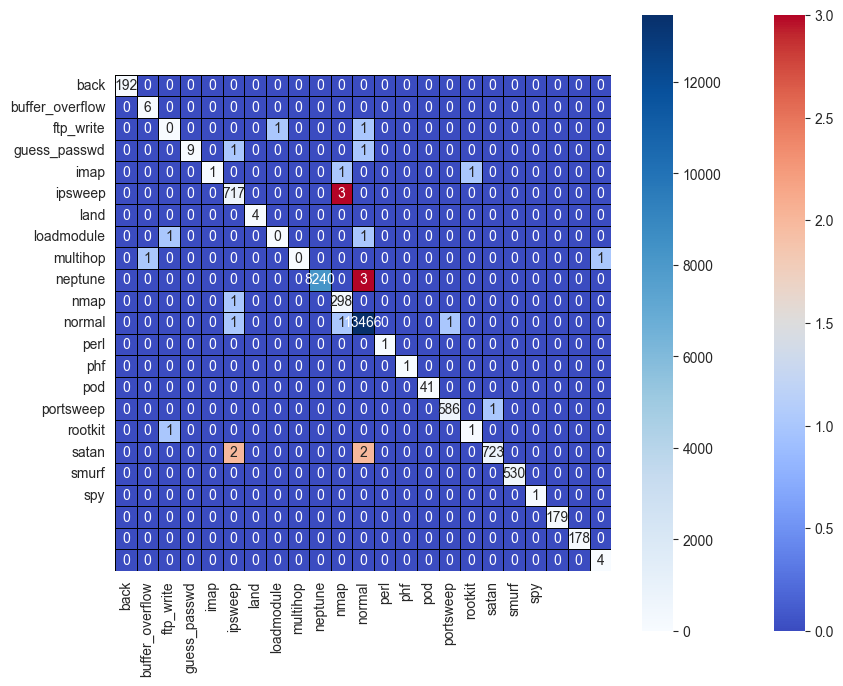

In [23]:
best_xgb = random_search.best_estimator_
y_pred_xgb_best = best_xgb.predict(X_test)

cmbestxgb = confusion_matrix(y_test, y_pred_xgb_best)

cmap = sns.color_palette("coolwarm", as_cmap=True)
mask = np.eye(cmbestrf.shape[0], dtype=bool)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cmbestxgb, annot=True, fmt='d', cmap=cmap, cbar=True, square=True, mask=mask, 
            linecolor='black', linewidth=0.5,
            xticklabels=target_classes, yticklabels=target_classes)  # Mask diagonal elements to hide them

# Highlight off-diagonal values (you can choose a specific color for the off-diagonal)
sns.heatmap(cmbestxgb, annot=True, fmt='d', cmap='Blues', cbar=True, square=True, 
            mask=~mask, linecolor='black', linewidth=0.5,
            xticklabels=target_classes[0:-3], yticklabels=target_classes[0:-3]) 

In [26]:
from sklearn.metrics import classification_report
best_xgb_rep = classification_report(y_test, y_pred_xgb_best,target_names=name_labels,output_dict=True)
pd.DataFrame(best_xgb_rep).T

d:\Scaler\end_to_end\Donor_Choose\project\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Scaler\end_to_end\Donor_Choose\project\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Scaler\end_to_end\Donor_Choose\project\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

,precision,recall,f1-score,support
back,1.000000,1.000000,1.000000,192.000000
buffer_overflow,0.857143,1.000000,0.923077,6.000000
ftp_write,0.000000,0.000000,0.000000,2.000000
guess_passwd,1.000000,0.818182,0.900000,11.000000
imap,1.000000,0.333333,0.500000,3.000000
ipsweep,0.993075,0.995833,0.994452,720.000000
land,1.000000,1.000000,1.000000,4.000000
loadmodule,0.000000,0.000000,0.000000,2.000000
multihop,0.000000,0.000000,0.000000,2.000000
neptune,1.000000,0.999636,0.999818,8243.000000
